In [86]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [50]:
separator = r',\s+'

In [51]:
df=pd.read_excel('/content/drive/MyDrive/Python Data/Log9/open-meteo-13.00N77.60E914m.xlsx')

In [52]:
df.head(5)

,time,temperature_2m (°C),relativehumidity_2m (%),dewpoint_2m (°C),rain (mm),direct_radiation (W/m²),diffuse_radiation (W/m²),direct_normal_irradiance (W/m²)
0,2020-01-01 00:00:00,18.8,94,17.8,0.0,0.0,0.0,0.0
1,2020-01-01 01:00:00,18.8,94,17.7,0.0,0.0,0.0,0.0
2,2020-01-01 02:00:00,18.6,95,17.7,0.0,0.0,0.0,0.0
3,2020-01-01 03:00:00,18.4,95,17.6,0.0,0.0,0.0,0.0
4,2020-01-01 04:00:00,18.2,95,17.4,0.0,0.0,0.0,0.0


In [53]:
df.columns

Index(['time', 'temperature_2m (°C)', 'relativehumidity_2m (%)',
       'dewpoint_2m (°C)', 'rain (mm)', 'direct_radiation (W/m²)',
       'diffuse_radiation (W/m²)', 'direct_normal_irradiance (W/m²)'],
      dtype='object')

In [59]:
print(df.isna().sum())

time                               0
temperature_2m (°C)                0
relativehumidity_2m (%)            0
dewpoint_2m (°C)                   0
rain (mm)                          0
direct_radiation (W/m²)            0
diffuse_radiation (W/m²)           0
direct_normal_irradiance (W/m²)    0
dtype: int64


In [58]:

df['relativehumidity_2m (%)'] = pd.to_numeric(df['relativehumidity_2m (%)'], errors='coerce')
df['relativehumidity_2m (%)'] = df['relativehumidity_2m (%)'].fillna(df['relativehumidity_2m (%)'].mean())
df['dewpoint_2m (°C)'] = pd.to_numeric(df['dewpoint_2m (°C)'], errors='coerce')
df['dewpoint_2m (°C)'] = df['dewpoint_2m (°C)'].fillna(df['dewpoint_2m (°C)'].mean())
df['rain (mm)'] = df['rain (mm)'].fillna(df['rain (mm)'].mean())
df['direct_radiation (W/m²)'] = df['direct_radiation (W/m²)'].fillna(df['direct_radiation (W/m²)'].mean())
df['diffuse_radiation (W/m²)'] = df['diffuse_radiation (W/m²)'].fillna(df['diffuse_radiation (W/m²)'].mean())
df['direct_normal_irradiance (W/m²)'] = df['direct_normal_irradiance (W/m²)'].fillna(df['direct_normal_irradiance (W/m²)'].mean())


In [76]:
df['time'].dtype

dtype('O')

In [101]:
df['time'].tail(5)

27422    2022-12-28 00:00:00
27423    2022-12-29 00:00:00
27424    2022-12-30 00:00:00
27425    2022-12-31 00:00:00
27426    2023-01-01 00:00:00
Name: time, dtype: object

In [82]:
rain_data = df[['time', 'rain (mm)']].copy()

In [83]:
rain_data.set_index('time', inplace=True)

In [84]:
rain_data.isnull().sum()

rain (mm)    0
dtype: int64

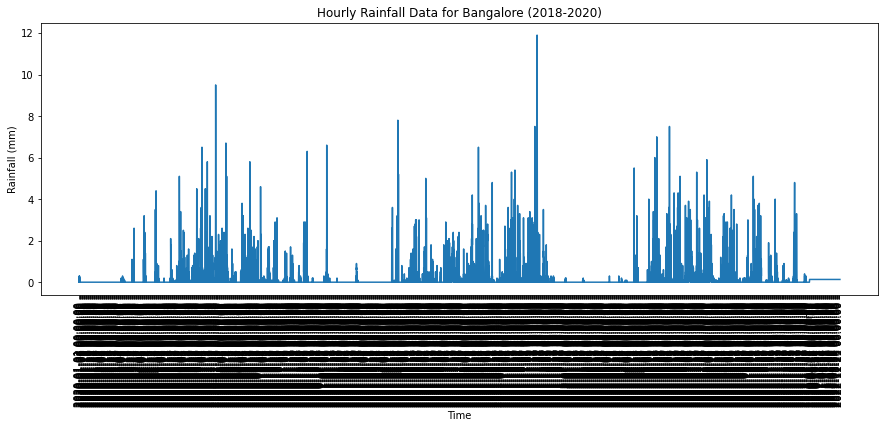

In [88]:
plt.figure(figsize=(15, 5))
plt.plot(range(len(rain_data)), rain_data)
plt.xticks(range(0, len(rain_data), 24), df['time'][::24], rotation=90)
plt.xlabel('Time')
plt.ylabel('Rainfall (mm)')
plt.title('Hourly Rainfall Data for Bangalore (2018-2020)')
plt.show()

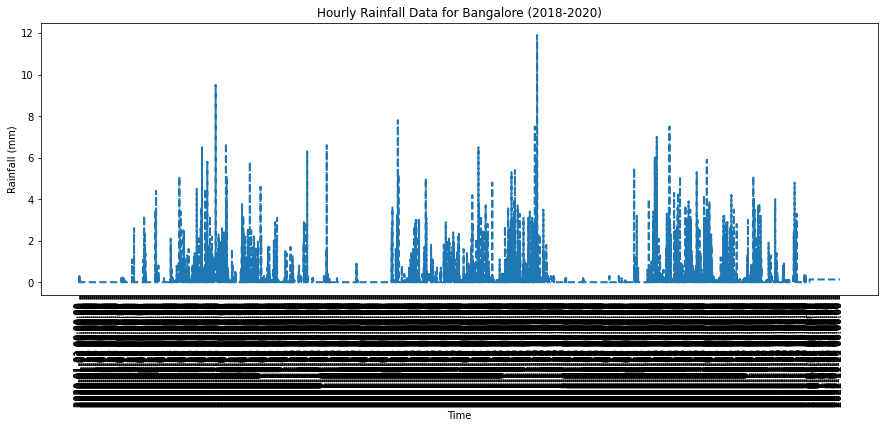

In [89]:
plt.figure(figsize=(15, 5))
plt.plot(range(len(rain_data)), rain_data, linestyle='--', linewidth=2)
plt.xticks(range(0, len(rain_data), 24), df['time'][::24], rotation=90)
plt.xlabel('Time')
plt.ylabel('Rainfall (mm)')
plt.title('Hourly Rainfall Data for Bangalore (2018-2020)')
plt.show()


In [93]:
rain_data.head()

,rain (mm)
time,
2020-01-01 00:00:00,0.0
2020-01-01 01:00:00,0.0
2020-01-01 02:00:00,0.0
2020-01-01 03:00:00,0.0
2020-01-01 04:00:00,0.0


In [96]:
train_size = int(len(rain_data) * 0.8)
train_data = rain_data.iloc[:train_size, :]
test_data = rain_data.iloc[train_size:, :]



In [97]:
X_train = np.array(range(len(train_data))).reshape((-1, 1))
y_train = train_data.values
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [98]:
X_test = np.array(range(len(test_data))).reshape((-1, 1))
y_test = test_data.values
y_pred = model.predict(X_test)

In [99]:
mae = np.mean(np.abs(y_test - y_pred))
print(f'MAE: {mae:.2f} mm')

MAE: 0.18 mm


ConversionError: ignored

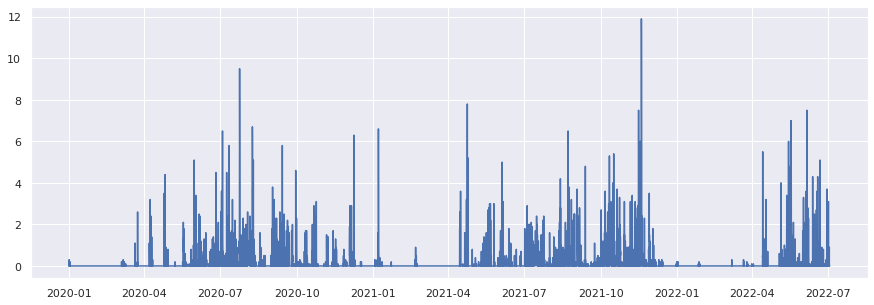

In [100]:
plt.figure(figsize=(15, 5))
plt.plot(train_data.index, train_data.values, label='Training Data')
plt.plot(test_data.index, test_data.values, label='Testing Data')
plt.plot(test_data.index, y_pred, label='Predicted Values')
plt.xlabel('Time')
plt.ylabel('Rainfall (mm)')
plt.title('Hourly Rainfall Data and Predictions for Bangalore (2018-2020)')
plt.legend()
plt.show()

Here MAE is used because this tells the average magnitude errors of the predicted and actual. This doesnt consider the direction of error and it can also use the same metrics of the prdiction

In [103]:
report = f'''
Bangalore Hourly Rainfall Prediction (2020-2023)

Training Data Size: {len(train_data)}
Testing Data Size: {len(test_data)}
Model: Linear Regression
MAE: {mae:.2f} mm
'''
print(report)


Bangalore Hourly Rainfall Prediction (2020-2023)

Training Data Size: 21940
Testing Data Size: 5486
Model: Linear Regression
MAE: 0.18 mm



In [104]:
with open('report.txt', 'w') as f:
    
    f.write(report)